# Color-magnitude diagram: narrowband filters

In this tutorial, we will compute synthetic photometry for the narrowband H2 and H3 filters of VLT/SPHERE. We will use empirical data from the [SpeX Prism Spectral Library](http://pono.ucsd.edu/~adam/browndwarfs/spexprism/index_old.html) and theoretical isochrones and spectra from the AMES-Cond and AMES-Dusty models. The synthetic colors and magnitudes are compared with the photometric data of directly imaged companions in a color-magnitude diagram.

## Getting started

We start by importing the required Python modules.

In [1]:
import urllib.request
import numpy as np
import species

Next, we initiate the *species* workflow with `SpeciesInit`. This will create the configuration file with default values and the HDF5 database.

In [2]:
species.SpeciesInit()

Initiating species v0.3.1... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


Later on, we will interpolate the isochrone data at an age of 20 Myr for 100 logarithmically-spaced masses between 1 M<sub>Jup</sub> and 1000 M<sub>Jup</sub>.

In [3]:
age = 20.  # (Myr)
masses = np.logspace(0., 3., 100)  # (Mjup)

## Adding data and models

We will now add the required data to the database by first creating an instance of `Database`.

In [4]:
database = species.Database()

The [photometric data of directly imaged companions](https://github.com/tomasstolker/species/blob/master/species/data/companions.py) that is available with *species* is added by using the `add_companion` method with `name=None`. Alternative, `add_object` can be used to manually add photometric and spectroscopic data of an individual object.

In [5]:
database.add_companion(name=None)

Adding Vega spectrum... [DONE]
Adding filter: LCO/VisAO.Ys... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.NB374... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Adding object: beta Pic b
   - Distance (pc) = 19.75 +/- 0.13
   - LCO/VisAO.Ys:
      - Apparent magnitude = 15.53 +/- 0.34
      - Flux (W m-2 um-1) = 4.27e-15 +/- 1.36e-15
   - Paranal/NACO.J:
      - Apparent magnitude = 14.11 +/- 0.21
      - Flux (W m-2 um-1) = 6.87e-15 +/- 1.34e-15
   - Gemini/NICI.ED286:
      - Apparent magnitude = 13.18 +/- 0.15
      - Flux (W m-2 um-1) = 6.99e-15 +/- 9.69e-16
   - Paranal/NACO.H:
      - Apparent magnitude = 13.32 +/- 0.14
      - Flux (W 

/Users/tomasstolker/applications/species/species/data/filters.py:170: UserWarning: The minimum transmission value of Subaru/CIAO.z is smaller than zero (-1.80e-03). Wavelengths with negative transmission values will be removed.
  warnings.warn(f'The minimum transmission value of {filter_id} is smaller than zero '


 [DONE]
Adding filter: Keck/NIRC2.H... [DONE]
Adding filter: Keck/NIRC2.Ks... [DONE]
Adding object: HR 8799 b
   - Distance (pc) = 41.29 +/- 0.15
   - Subaru/CIAO.z:
      - Apparent magnitude = 21.22 +/- 0.29
      - Flux (W m-2 um-1) = 1.93e-17 +/- 5.22e-18
   - Paranal/SPHERE.IRDIS_B_J:
      - Apparent magnitude = 19.78 +/- 0.09
      - Flux (W m-2 um-1) = 3.90e-17 +/- 3.24e-18
   - Keck/NIRC2.H:
      - Apparent magnitude = 18.05 +/- 0.09
      - Flux (W m-2 um-1) = 7.32e-17 +/- 6.08e-18
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Apparent magnitude = 18.08 +/- 0.14
      - Flux (W m-2 um-1) = 7.67e-17 +/- 9.92e-18
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Apparent magnitude = 17.78 +/- 0.10
      - Flux (W m-2 um-1) = 8.57e-17 +/- 7.91e-18
   - Keck/NIRC2.Ks:
      - Apparent magnitude = 17.03 +/- 0.08
      - Flux (W m-2 um-1) = 6.98e-17 +/- 5.15e-18
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Apparent magnitude = 17.15 +/- 0.06
      - Flux (W m-2 um-1) = 6.71e-17 +/- 3.71e-18
 

Adding filter: Paranal/SPHERE.IRDIS_B_Ks... [DONE]
Adding object: RZ Psc B
   - Distance (pc) = 195.86 +/- 4.03
   - Paranal/SPHERE.IRDIS_B_H (2 values):
      - Apparent magnitude = 13.71 +/- 0.14
      - Flux (W m-2 um-1) = 4.07e-15 +/- 5.26e-16
      - Apparent magnitude = 13.85 +/- 0.26
      - Flux (W m-2 um-1) = 3.58e-15 +/- 8.65e-16
   - Paranal/SPHERE.IRDIS_B_Ks:
      - Apparent magnitude = 13.51 +/- 0.20
      - Flux (W m-2 um-1) = 1.69e-15 +/- 3.12e-16
Adding filter: HST/WFPC2-PC.F606W... [DONE]
Adding filter: HST/WFPC2-PC.F814W... [DONE]
Adding filter: HST/NICMOS2.F171M... [DONE]
Adding filter: HST/NICMOS2.F190N... [DONE]
Adding filter: HST/NICMOS2.F215N... [DONE]
Adding filter: Magellan/VisAO.ip... [DONE]
Adding filter: Magellan/VisAO.zp... [DONE]
Adding filter: Magellan/VisAO.Ys... [DONE]
Adding filter: Subaru/CIAO.CH4s... [DONE]
Adding filter: Subaru/CIAO.K... [DONE]
Adding filter: Subaru/CIAO.Lp... [DONE]
Adding object: GQ Lup B
   - Distance (pc) = 151.82 +/- 1.10
   -

Adding filter: Gemini/GMOS-S.z... [DONE]
Adding filter: CFHT/Wircam.Y... [DONE]
Adding filter: CFHT/Wircam.J... [DONE]
Adding filter: CFHT/Wircam.H... [DONE]
Adding filter: CFHT/Wircam.Ks... [DONE]
Adding filter: WISE/WISE.W1... [DONE]
Adding filter: WISE/WISE.W2... [DONE]
Adding object: GU Psc b
   - Distance (pc) = 47.61 +/- 0.16
   - Gemini/GMOS-S.z:
      - Apparent magnitude = 21.75 +/- 0.07
      - Flux (W m-2 um-1) = 1.63e-17 +/- 1.05e-18
   - CFHT/Wircam.Y:
      - Apparent magnitude = 19.40 +/- 0.05
      - Flux (W m-2 um-1) = 1.06e-16 +/- 4.87e-18
   - CFHT/Wircam.J:
      - Apparent magnitude = 18.12 +/- 0.03
      - Flux (W m-2 um-1) = 1.72e-16 +/- 4.76e-18
   - CFHT/Wircam.H:
      - Apparent magnitude = 17.70 +/- 0.03
      - Flux (W m-2 um-1) = 1.02e-16 +/- 2.82e-18
   - CFHT/Wircam.Ks:
      - Apparent magnitude = 17.40 +/- 0.03
      - Flux (W m-2 um-1) = 4.98e-17 +/- 1.38e-18
   - WISE/WISE.W1:
      - Apparent magnitude = 17.17 +/- 0.33
      - Flux (W m-2 um-1) = 1.

The spectra from the SpeX Prism Spectral Library are also downloaded and added to the database. For each spectrum, the [SIMBAD Astronomical Database](http://simbad.u-strasbg.fr/simbad/) is queried for the SIMBAD identifier. The identifier is then used to extract the [distance](https://people.phys.ethz.ch/~stolkert/species/distance.dat) of the object (calculated from the parallax). A NaN value is stored for the distance if the object could not be identified in the SIMBAD database so these objects are not used in the color-magnitude diagram.

In [6]:
database.add_spectrum('spex')

Adding filter: 2MASS/2MASS.H... [DONE]
Adding SpeX Prism Spectral Library... 2MASSW J1645221-131951            

/Users/tomasstolker/.pyenv/versions/3.6.10/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J21225635+3656002
  (error.line, error.msg))


Adding SpeX Prism Spectral Library... 2MASS J05103520-4208140           

/Users/tomasstolker/.pyenv/versions/3.6.10/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14044941-3159329
  (error.line, error.msg))
/Users/tomasstolker/.pyenv/versions/3.6.10/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J05103520-4208140
  (error.line, error.msg))


Adding SpeX Prism Spectral Library... SDSS J104335.08+121314.1          

/Users/tomasstolker/.pyenv/versions/3.6.10/envs/general3.6/lib/python3.6/site-packages/astroquery/simbad/core.py:138: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : 2MASS J14162394+1348363
  (error.line, error.msg))


Adding SpeX Prism Spectral Library... [DONE]                            


The AMES-Cond model spectra (i.e. for cloudless atmospheres) are also downloaded and imported into the database.

In [7]:
database.add_model('ames-cond')

Unpacking AMES-Cond model spectra (150 MB)... [DONE]
Adding AMES-Cond model spectra... [DONE]                               
Grid points stored in the database:
   - Teff = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100. 1200.
 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400.
 2500. 2600. 2700. 2800. 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600.
 3700. 3800. 3900. 4000. 4100. 4200. 4300. 4400. 4500. 4600. 4700. 4800.
 5000. 5100. 5200. 5300. 5400. 5500. 5600. 5700. 5800. 5900. 6000. 6100.
 6200. 6300. 6400. 6500. 6600.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]
Number of grid points per parameter:
   - teff: 65
   - logg: 7
Fix missing grid points with a linear interpolation:
   - teff = 200.0, logg = 5.5
   - teff = 900.0, logg = 2.5
   - teff = 4700.0, logg = 4.5
   - teff = 4700.0, logg = 5.0
   - teff = 4700.0, logg = 5.5
   - teff = 4800.0, logg = 2.5
   - teff = 4800.0, logg = 3.0
   - teff = 4800.0, logg = 4.5
   - teff = 6100.0, log

/Users/tomasstolker/applications/species/species/util/data_util.py:275: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


And also the AMES-Dusty model spectra (i.e. for dusty atmospheres) are downloaded and imported into the database.

In [8]:
database.add_model('ames-dusty')

Unpacking AMES-Dusty model spectra (59 MB)... [DONE]
Adding AMES-Dusty model spectra... [DONE]                                
Grid points stored in the database:
   - Teff = [ 500.  600.  700.  800.  900. 1000. 1100. 1200. 1300. 1400. 1500. 1600.
 1700. 1800. 1900. 2000. 2100. 2200. 2300. 2400. 2500. 2600. 2700. 2800.
 2900. 3000. 3100. 3200. 3300. 3400. 3500. 3600. 3700. 3800. 3900. 4000.]
   - log(g) = [3.5 4.  4.5 5.  5.5 6. ]
Number of grid points per parameter:
   - teff: 36
   - logg: 6
Fix missing grid points with a linear interpolation:
   - teff = 900.0, logg = 6.0
   - teff = 1200.0, logg = 5.5
   - teff = 2100.0, logg = 3.5
   - teff = 2100.0, logg = 4.5
   - teff = 2200.0, logg = 3.5
   - teff = 2400.0, logg = 5.0
   - teff = 3100.0, logg = 3.5
   - teff = 3200.0, logg = 3.5
   - teff = 3300.0, logg = 3.5
   - teff = 3400.0, logg = 3.5
   - teff = 3500.0, logg = 3.5
   - teff = 3600.0, logg = 3.5
   - teff = 3700.0, logg = 3.5
   - teff = 3800.0, logg = 3.5
   - teff = 390

The AMES-Cond and AMES-Dusty isochones are now downloaded. We note that the evolutionary data of these isochrones are identical and only the magnitudes are different, but for clarity we consider the isochrones from both AMES-Cond and AMES-Dusty.

In [9]:
urllib.request.urlretrieve('https://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                           'data/model.AMES-Cond-2000.M-0.0.NaCo.Vega')

('data/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
 <http.client.HTTPMessage at 0x13b9cf358>)

In [10]:
urllib.request.urlretrieve('https://phoenix.ens-lyon.fr/Grids/AMES-Dusty/ISOCHRONES/model.AMES-dusty.M-0.0.NaCo.Vega',
                           'data/model.AMES-dusty.M-0.0.NaCo.Vega')

('data/model.AMES-dusty.M-0.0.NaCo.Vega',
 <http.client.HTTPMessage at 0x13b9cff60>)

The isochrone data are added to the database with the `add_isochrones` method.

In [11]:
database.add_isochrones(filename='data/model.AMES-Cond-2000.M-0.0.NaCo.Vega',
                        tag='iso_ames-cond')

Adding isochrones: iso_ames-cond... [DONE]


In [12]:
database.add_isochrones(filename='data/model.AMES-dusty.M-0.0.NaCo.Vega',
                        tag='iso_ames-dusty')

Adding isochrones: iso_ames-dusty... [DONE]


## Synthetic colors and magnitudes

For the narrowband filters of SPHERE, the synthetic colors and magnitudes are computed from the SpeX spectra. We start by creating an instance of `ReadColorMagnitude`.

In [13]:
read_color = species.ReadColorMagnitude(library='spex',
                                        filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                        filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

All spectra are used and the colors and magnitudes are stored in a `ColorMagObject`.

In [14]:
colorbox = read_color.get_color_magnitude(object_type=None)

Next, the isochrone data is extracted by first creating and instance of `ReadIsochrone`.

In [15]:
read_iso_cond = species.ReadIsochrone(tag='iso_ames-cond')
read_iso_dusty = species.ReadIsochrone(tag='iso_ames-dusty')

To interpolate the isochrones and compute synthetic photometry, we use the `get_color_magnitude` method and give the grid of model spectra (i.e. that was stored with `add_model`) as argument of `model`. The method will return a `ColorMagBox` object.

In [16]:
modelcolor1 = read_iso_cond.get_color_magnitude(age=age,
                                                masses=masses,
                                                model='ames-cond',
                                                filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

In [17]:
modelcolor2 = read_iso_dusty.get_color_magnitude(age=age,
                                                 masses=masses,
                                                 model='ames-dusty',
                                                 filters_color=('Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3'),
                                                 filter_mag='Paranal/SPHERE.IRDIS_D_H23_2')

/Users/tomasstolker/applications/species/species/read/read_isochrone.py:218: UserWarning: The value of logg is 2.917784581524866, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 501.3728693602355, 'logg': 2.917784581524866, 'mass': 1.0, 'distance': 10.0}.
  warnings.warn(f'The value of {item_bounds} is {model_param[item_bounds]}, '
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:218: UserWarning: The value of logg is 2.972779343287681, which is below the lower bound of the model grid (3.5). Setting the magnitudes to NaN for the following isochrone sample: {'teff': 502.51561905255875, 'logg': 2.972779343287681, 'mass': 1.0722672220103233, 'distance': 10.0}.
  warnings.warn(f'The value of {item_bounds} is {model_param[item_bounds]}, '
/Users/tomasstolker/applications/species/species/read/read_isochrone.py:218: UserWarning: The value of logg is 3.035244115774989, which is below the l

Some warnings are printed for temperatures (i.e. masses) that are outside the grid of isochrone data and also when the log(g) from the isochrone data is outside the log(g) range of the grid with model spectra. In those case, the magnitudes and colors are set to NaN and will be ignored in the color-magnitude diagram.

## Selecting directly imaged planets

Let's have a look at the available companion data that were added to the database with `add_companion`.

In [18]:
database.list_companions()

Object name = beta Pic b
Distance (pc) = 19.75 +/- 0.13
LCO/VisAO.Ys (mag) = 15.53 +/- 0.34
Paranal/NACO.J (mag) = 14.11 +/- 0.21
Gemini/NICI.ED286 (mag) = 13.18 +/- 0.15
Paranal/NACO.H (mag) = 13.32 +/- 0.14
Paranal/NACO.Ks (mag) = 12.64 +/- 0.11
Paranal/NACO.NB374 (mag) = 11.25 +/- 0.23
Paranal/NACO.Lp (mag) = 11.3 +/- 0.06
Paranal/NACO.NB405 (mag) = 10.98 +/- 0.05
Paranal/NACO.Mp (mag) = 11.1 +/- 0.12
Paranal/SPHERE.IRDIS_D_K12_1 (mag) = 12.568 +/- 0.003
Paranal/SPHERE.IRDIS_D_K12_2 (mag) = 12.206 +/- 0.002

Object name = HIP 65426 b
Distance (pc) = 109.21 +/- 0.75
Paranal/SPHERE.IRDIS_D_H23_2 (mag) = 17.94 +/- 0.05
Paranal/SPHERE.IRDIS_D_H23_3 (mag) = 17.58 +/- 0.06
Paranal/SPHERE.IRDIS_D_K12_1 (mag) = 17.01 +/- 0.09
Paranal/SPHERE.IRDIS_D_K12_2 (mag) = 16.79 +/- 0.09
Paranal/NACO.Lp (mag) = 15.33 +/- 0.12
Paranal/NACO.NB405 (mag) = 15.23 +/- 0.22
Paranal/NACO.Mp (mag) = 14.65 +/- 0.29

Object name = 51 Eri b
Distance (pc) = 29.78 +/- 0.12
MKO/NSFCam.J (mag) = 19.04 +/- 0.4
MKO/NSF

We select a few of these directly imaged planets and brown dwarfs for which SPHERE H2 and H3 photometry are available in the database. For each companion, a tuple needs to be provided with the name (as used in the database), the filter names for the color, and the filter name for the magnitude.

In [19]:
objects = [('HIP 65426 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 b', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('HR 8799 d', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2'),
           ('PZ Tel B', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_H23_2')]

## Plotting a color-magnitude diagram

Finally, we will create the color-magnitude diagram by providing the `ColorMagBox` objects as list to the `boxes` parameter of `plot_color_magnitude`. Further details on the various parameters of this function can be found in the [API documentation](https://species.readthedocs.io/en/latest/species.plot.html?highlight=plot_color_mag#species.plot.plot_color.plot_color_magnitude).

In [20]:
species.plot_color_magnitude(boxes=[colorbox, modelcolor1, modelcolor2],
                             objects=objects,
                             mass_labels=[(3., 'left'), (5., 'left'), (10., 'left'), (20., 'right'), (50., 'right'), (100., 'right')],
                             companion_labels=True,
                             field_range=('late M', 'late T'),
                             label_x='H2 $-$ H3',
                             label_y='M$_\mathregular{H2}$',
                             xlim=(-2.7, 1.8),
                             ylim=(17.3, 7),
                             offset=(-0.07, -0.1),
                             legend=(0.08, 0.8),
                             output='color_mag.png')

Plotting color-magnitude diagram: color_mag.png... [DONE]


Let's have a look at the plot! As expected, the colors become bluer towards lower masses/temperatures due to CH<sub>4</sub> absorption in the H3 filter.

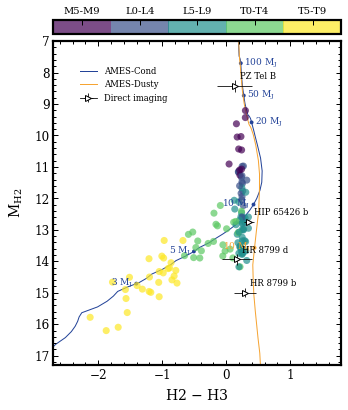

In [21]:
from IPython.display import Image
Image('color_mag.png') 